# Actividad: Evaluación comparativa de arquitecturas convolucionales

Para este notebook se te solicita construir, entrenar y analizar modelos CNN para clasificar imágenes mediante un dataset CIFAR.

**Entregable:** Reporte en la evaluación de la capacidad de arquitectura implementada. Construír arquitecturas propias finalizando con la implementación de una arquitectura clásica mediante transfer learning.


## Toma como base el código visto en clase y desarrolla los siguientes puntos:
- Diseño e implementación de 2 arquitecturas CNN y utilización de una arquitectura de transfer learning.

- Buen uso de data augmentation y regularización.

- Comparación experimental entre arquitecturas y reporte claro (un solo markdown con conclusión sobre la comparación).





In [1]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar imágenes
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Datos cargados y normalizados.")
print("x_train:", x_train.shape, "y_train:", y_train.shape)



170498071/170498071 [==============================] - 34s 0us/step
Datos cargados y normalizados.
x_train: (50000, 32, 32, 3) y_train: (50000, 10)


## Definiciones de modelos

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

# --- Modelo CNN 1 ---
model1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# --- Modelo CNN 2 ---
model2 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# --- Transfer Learning (VGG16) ---
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model_tl = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

print("Definición de modelos lista.")



58889256/58889256 [==============================] - 13s 0us/step
Definición de modelos lista.


## Entrenamiento de modelos.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Función para compilar y entrenar
def compile_and_train(model, epochs=20):
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        datagen.flow(x_train, y_train, batch_size=64),
        epochs=epochs,
        validation_data=(x_test, y_test)
    )
    return history

# Entrenar modelos
history1 = compile_and_train(model1, epochs=10)
history2 = compile_and_train(model2, epochs=10)
history_tl = compile_and_train(model_tl, epochs=10)



Epoch 1/10


782/782 [==============================] - 39s 48ms/step - loss: 1.7529 - accuracy: 0.3536 - val_loss: 1.4053 - val_accuracy: 0.4891
Epoch 2/10
782/782 [==============================] - 37s 48ms/step - loss: 1.4899 - accuracy: 0.4595 - val_loss: 1.2420 - val_accuracy: 0.5529
Epoch 3/10
782/782 [==============================] - 39s 50ms/step - loss: 1.3820 - accuracy: 0.5052 - val_loss: 1.1448 - val_accuracy: 0.5855
Epoch 4/10
782/782 [==============================] - 42s 54ms/step - loss: 1.3223 - accuracy: 0.5291 - val_loss: 1.0584 - val_accuracy: 0.6236
Epoch 5/10
782/782 [==============================] - 43s 55ms/step - loss: 1.2711 - accuracy: 0.5466 - val_loss: 1.0538 - val_accuracy: 0.6269
Epoch 6/10
782/782 [==============================] - 46s 59ms/step - loss: 1.2370 - accuracy: 0.5604 - val_loss: 0.9977 - val_accuracy: 0.6459
Epoch 7/10
782/782 [==============================] - 39s 50ms/step - loss: 1.2053 - accuracy: 0.5751 - val_loss: 0.9631 - val_accura

## Estadística y gráficos

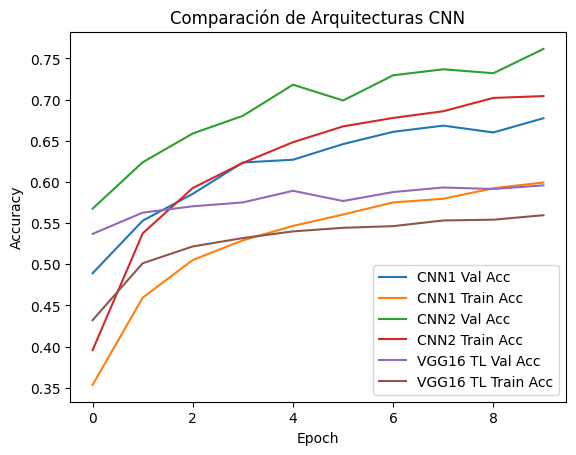

In [4]:
import matplotlib.pyplot as plt

def plot_history(histories, titles):
    for i, history in enumerate(histories):
        plt.plot(history.history['val_accuracy'], label=f'{titles[i]} Val Acc')
        plt.plot(history.history['accuracy'], label=f'{titles[i]} Train Acc')
    plt.title('Comparación de Arquitecturas CNN')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history([history1, history2, history_tl], ['CNN1','CNN2','VGG16 TL'])


# Conclusiones.

Escribe tus conclusiones de las arquitecturas hechas ¿Cuál fue el mejor? ¿Por qué? ¿Qué mejoraría? ¿Cómo lo mejoraría?

La CNN1 es más simple y rápida pero no capta tantos detalles de las imágenes.
La CNN2 es más completa y aprende patrones más complejos pero tarda más en entrenar.
El modelo de Transfer Learning con VGG16 es el que mejor se comporta: aprende rápido, evita sobreajustarse y funciona bien aunque tengamos pocos datos.
Si quisiera mejorar le metería más filtros a mis propias CNN, jugaría con más data augmentation y si uso Transfer Learning probaría hacer fine-tuning para que se adapte todavía mejor a nuestras imágenes.